In [ ]:
# project: p13
# submitter: bpilon
# partner: None

In [1]:
import os
import time
import requests
import pandas as pd
from pandas import DataFrame, Series
import copy
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt


In [2]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return str(filename) + " already exists!"
    #Download
    r = requests.get(url)
    r.raise_for_status
    print(filename)
    f = open(filename, 'w',  encoding = "utf-8")
    f.write(r.text)
    f.close()
    return str(filename) + " created!"

In [3]:
download('countries.json', 'https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p13/countries.json')
countries = pd.read_json('countries.json')
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2381740,17.14,0.04,Africa,Algeria,4.61,6000,31.00,"70,0",-0.39,"78,1",32930091,NORTHERN AFRICA
170,103000,13.64,4.83,Europe,Iceland,6.72,30900,3.31,"99,9",2.38,"647,7",299388,WESTERN EUROPE
171,748,25.37,56.02,Australia,Tonga,5.28,2200,12.62,"98,5",0.00,"97,7",114689,OCEANIA
172,27750,36.44,6.38,North America,Haiti,12.17,1600,73.45,"52,9",-3.40,"16,9",8308504,LATIN AMER. & CARIB


In [4]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

In [5]:
def qry(sql, cap=10):
    return pd.read_sql(sql,c).head(cap)

c = sqlite3.connect("countries.db")


In [6]:
#Q1: In our dataset, how many countries are in each region?

q1 = qry("""
SELECT region, COUNT(country) AS `number of countries`
FROM countries
GROUP BY region
ORDER BY COUNT(country) DESC, region ASC
""", cap = len(pd.unique(countries['region'])))

q1

,region,number of countries
0,SUB-SAHARAN AFRICA,42
1,LATIN AMER. & CARIB,33
2,WESTERN EUROPE,22
3,ASIA (EX. NEAR EAST),21
4,NEAR EAST,13
5,C.W. OF IND. STATES,12
6,OCEANIA,12
7,EASTERN EUROPE,8
8,NORTHERN AFRICA,5
9,BALTICS,3


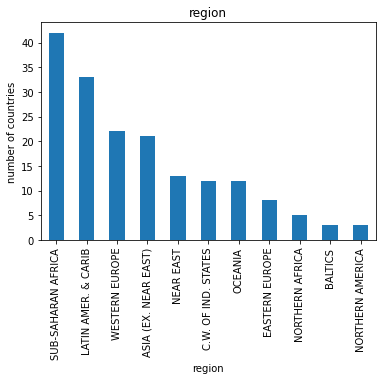

In [7]:
#Q2: How many countries are in each region? (answer with a plot)
q2 = copy.deepcopy(q1)
q2 = q2.set_index("region")
ax = q2.plot.bar()
ax.set_ylabel("number of countries")
ax.set_title("region")
ax.get_legend().remove()

In [8]:
#Q3: What is the total area of each region?

q3 = qry("""
SELECT region, SUM(area) AS `total area`
FROM countries
GROUP BY region
ORDER BY SUM(area) DESC, region ASC
""", cap = len(pd.unique(countries['region'])))

q3

,region,total area
0,ASIA (EX. NEAR EAST),22177295
1,C.W. OF IND. STATES,22100843
2,LATIN AMER. & CARIB,20426877
3,NORTHERN AMERICA,19616143
4,SUB-SAHARAN AFRICA,19446660
5,OCEANIA,8488612
6,NORTHERN AFRICA,5752890
7,NEAR EAST,4340116
8,WESTERN EUROPE,3707838
9,EASTERN EUROPE,938554


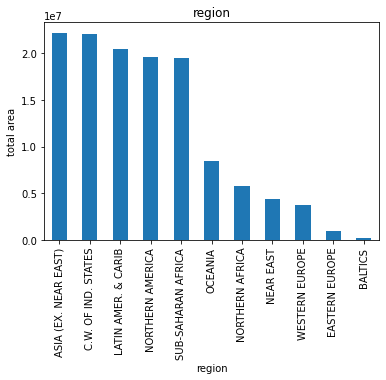

In [9]:
#Q4: What is the total area of each region? (answer with a plot)

q4 = copy.deepcopy(q3)
q4 = q4.set_index("region")
ax = q4.plot.bar()
ax.set_ylabel("total area")
ax.set_title("region")
ax.get_legend().remove()

In [10]:
#Q5: What is the area of each country in the Near East region?
q5 = qry("""
SELECT country, area
FROM countries
WHERE region == 'NEAR EAST'
ORDER BY area DESC, region ASC
""", cap = len(pd.unique(countries['country'])))

q5

,country,area
0,Saudi Arabia,1960582
1,Turkey,780580
2,Yemen,527970
3,Iraq,437072
4,Oman,212460
5,Syria,185180
6,Jordan,92300
7,United Arab Emirates,82880
8,Israel,20770
9,Kuwait,17820


In [11]:
#Q6: What are the top 12 countries that have the largest real GDP?
q6 = qry("""
SELECT country, (`gdp-per-capita`*`population`) / 1000000000.0 AS `Real GDP(billion)`
FROM countries
ORDER BY `Real GDP(billion)` DESC, country ASC
""", cap = 12)

q6

,country,Real GDP(billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


<AxesSubplot:xlabel='country'>

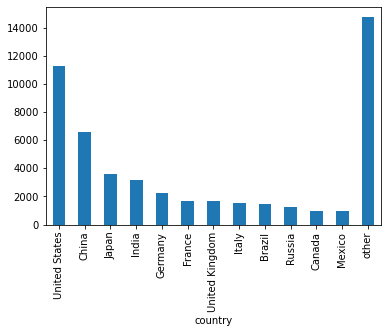

In [12]:
#Q7: What are the top 12 countries that have the largest real GDP? (answer with a plot)

q7 = qry("""
SELECT country, (`gdp-per-capita`*`population`) / 1000000000.0 AS `Real GDP(billion)`
FROM countries
ORDER BY `Real GDP(billion)` DESC
""", cap = len(pd.unique(countries['country'])))


q7 = q7.set_index("country")
q7_pt2 = q7['Real GDP(billion)'].iloc[:12]
q7_pt2['other'] = q7['Real GDP(billion)'].iloc[12:].sum()
q7_pt2.plot.bar()

Text(0, 0.5, 'literacy')

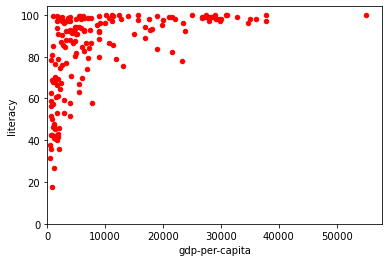

In [13]:
#Q8: What is the relationship between GDP per capita and literacy?

def dec_convert(x):
    return float(x.replace(',', '.'))
    
countries['literacy'] = countries['literacy'].apply(dec_convert)


ax = countries.plot.scatter(x="gdp-per-capita", y="literacy", c='r', xlim=0, ylim=0)
ax.set_xlabel('gdp-per-capita')
ax.set_ylabel("literacy")

In [14]:
#Q9: What is the correlation between GDP per capita and literacy?
conn.close()

conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)

q9 = qry("""
SELECT (`gdp-per-capita`) / 1.0 AS 'GDP-per-capita', literacy
FROM countries
ORDER BY `gdp-per-capita` DESC
""", cap = len(pd.unique(countries['country'])))
correlation = q9.corr()
correlation['GDP-per-capita'].iloc[1]

0.5154347345101356

Text(0, 0.5, 'phones')

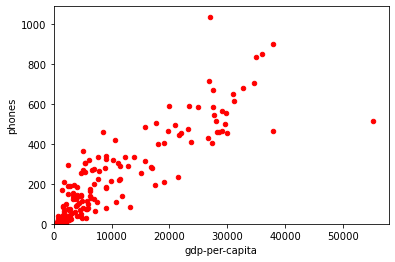

In [15]:
#Q10: What is the relationship between GDP per capita and phones?

countries['phones'] = countries['phones'].apply(dec_convert)
ax = countries.plot.scatter(x="gdp-per-capita", y="phones", c='r', xlim=0, ylim=0)
ax.set_xlabel('gdp-per-capita')
ax.set_ylabel("phones")

Text(0, 0.5, 'infant-mortality')

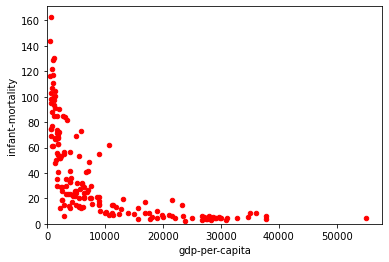

In [16]:
#Q11: What is the relationship between GDP per capita and infant-mortality?

ax = countries.plot.scatter(x="gdp-per-capita", y="infant-mortality", c='r', xlim=0, ylim=0)
ax.set_xlabel('gdp-per-capita')
ax.set_ylabel("infant-mortality")

Text(0, 0.5, 'inverse infant-mortality')

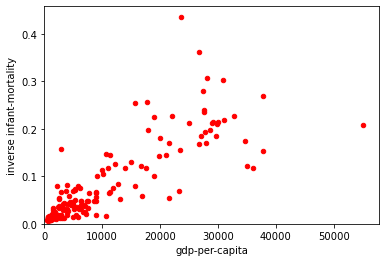

In [17]:
#Q12: What is the relationship between GDP per capita and inverse of infant-mortality?
q12 = qry("""
SELECT (`gdp-per-capita`) / 1.0 AS 'GDP-per-capita', 1/`infant-mortality` AS `inverse infant-mortality`
FROM countries
ORDER BY `gdp-per-capita` DESC
""", cap = len(pd.unique(countries['country'])))

ax = q12.plot.scatter(x="GDP-per-capita", y="inverse infant-mortality", c='r', xlim=0, ylim=0)
ax.set_xlabel('gdp-per-capita')
ax.set_ylabel("inverse infant-mortality")

In [18]:
#Q13: fit a y = m * x + n line to the scatter plot in question 10 using the least-squares method; 
#what are the coefficients m and n?


q13 = copy.deepcopy(countries)

output = q13["phones"]
q13["one"] = 1
inputs = q13[["gdp-per-capita", "one"]]

res = np.linalg.lstsq(inputs, output, rcond=None)

slope = res[0][0]
intercept = res[0][1]
slope, intercept

#q13["phones-fitted"] = q13["gdp-per-capita"] * slope + intercept
#q13.head()

#ax = q13.plot.scatter(x="gdp-per-capita", y="phones", c="r", xlim=0, ylim=0)
#ax.set_xlabel("gdp-per-capita)")
#ax.set_ylabel("phones")

#q13.plot.line(ax=ax, x="gdp-per-capita", y="phones-fitted", color="b")


(0.018088878836039785, 37.95908987837679)

In [19]:
#Q14: When gdp-per-capita = 30000, what is the expected value for phones according to the regression model between them?
def reg_calc(x,m,n):
    return m*x+n

reg_calc(30000, slope, intercept)

580.6254549595703

<AxesSubplot:xlabel='gdp-per-capita', ylabel='phones'>

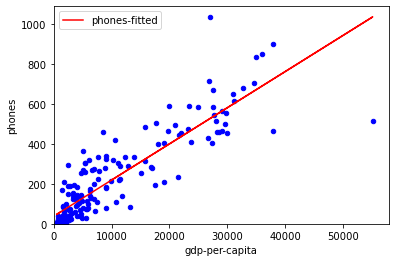

In [20]:
#Q15: plot the regression line to the scatter plot

q13["phones-fitted"] = q13["gdp-per-capita"] * slope + intercept
q13.head()

ax = q13.plot.scatter(x="gdp-per-capita", y="phones", c="b", xlim=0, ylim=0)
ax.set_xlabel("gdp-per-capita)")
ax.set_ylabel("phones")

q13.plot.line(ax=ax, x="gdp-per-capita", y="phones-fitted", color="r")

In [21]:
#Q16: What are the top 15 countries that have the smallest gap between birth rate and death rate?

q16 = qry("""
SELECT country, `birth-rate` , `death-rate`
FROM countries
ORDER BY `birth-rate` - `death-rate` ASC
""", cap = 15)
q16

,country,birth-rate,death-rate
0,Botswana,23.08,29.50
1,Ukraine,8.82,14.39
2,Russia,9.95,14.65
3,Bulgaria,9.65,14.27
4,Latvia,9.24,13.66
5,Lesotho,24.75,28.71
6,South Africa,18.20,22.00
7,Monaco,9.19,12.91
8,Hungary,9.72,13.11
9,Estonia,10.04,13.25


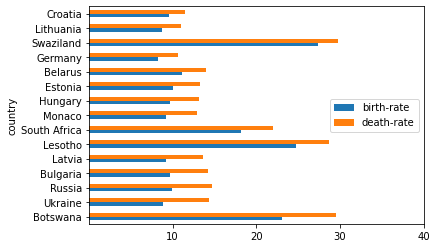

In [22]:
#Q17: What are the top 15 countries that have the smallest gap between birth rate and death rate? (answer with a plot)

ax = q16.plot.barh(x="country", y=["birth-rate", 'death-rate'], xlim=0, ylim=0)
ax.set_ylabel("country")
ax.set_xticks([10,20,30,40])

Text(0, 0.5, 'gdp-per-capita')

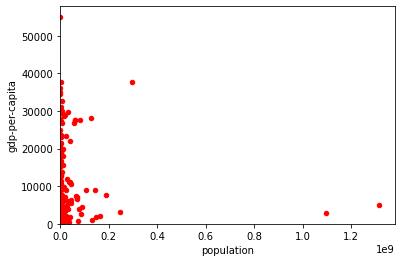

In [23]:
#Q18: What is the relationship between population and gdp-per-capita? (answer with a plot)

ax = countries.plot.scatter(x="population", y="gdp-per-capita", c='r', xlim=0, ylim=0)
ax.set_xlabel('population')
ax.set_ylabel("gdp-per-capita")

In [24]:
#Q19: Did you notice the four outliers? Which countries are they?

q19 = qry("""
SELECT country, `population` , `gdp-per-capita`
FROM countries
WHERE `population` >= 250000000 OR `gdp-per-capita`>=40000 
ORDER BY `gdp-per-capita` ASC
""", cap = 15)
q19

,country,population,gdp-per-capita
0,India,1095351995,2900
1,China,1313973713,5000
2,United States,298444215,37800
3,Luxembourg,474413,55100


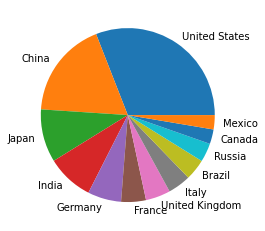

In [25]:
#Q20: what are the top 12 countries that have the largest real GDP? (answer with a plot)
type(q6['Real GDP(billion)'])


q6 = q6.set_index("country")

plot = q6.plot.pie(y='Real GDP(billion)')
plot.axes.get_yaxis().set_visible(False)
plot.axes.get_xaxis().set_visible(False)
plot.get_legend().remove()